In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d apollo2506/eurosat-dataset
!unzip eurosat-dataset.zip -d ./eurosat_data

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./eurosat_data/EuroSATallBands/River/River_1990.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1991.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1992.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1993.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1994.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1995.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1996.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1997.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1998.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_1999.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_2.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_20.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_200.tif  
  inflating: ./eurosat_data/EuroSATallBands/River/River_2000.tif  
  inflating

In [ ]:
!pip install tifffile

In [ ]:
import tifffile as tiff
import numpy as np

# Đường dẫn đến 1 ảnh cụ thể
img_path = "/content/eurosat_data/EuroSATallBands/AnnualCrop/AnnualCrop_1.tif"

# Đọc ảnh
img = tiff.imread(img_path)

# In shape và giá trị pixel đầu tiên
print("Shape của ảnh:", img.shape)
print("Pixel đầu tiên:", img[0, 0])

Shape của ảnh: (64, 64, 13)
Pixel đầu tiên: [1420 1291 1291 1600 1680 1841 2045 2016  546   13 3083 2325 2319]


In [ ]:
# Chuẩn hóa giá trị pixel trong dải từ 0 đến 1
img_normalized = img / np.max(img)

print(np.max(img))

# Kiểm tra pixel sau khi chuẩn hóa
print("Pixel đầu tiên (sau khi chuẩn hóa):", img_normalized[0, 0])

3490
Pixel đầu tiên (sau khi chuẩn hóa): [0.40687679 0.36991404 0.36991404 0.45845272 0.48137536 0.52750716
 0.58595989 0.57765043 0.15644699 0.00372493 0.88338109 0.66618911
 0.66446991]


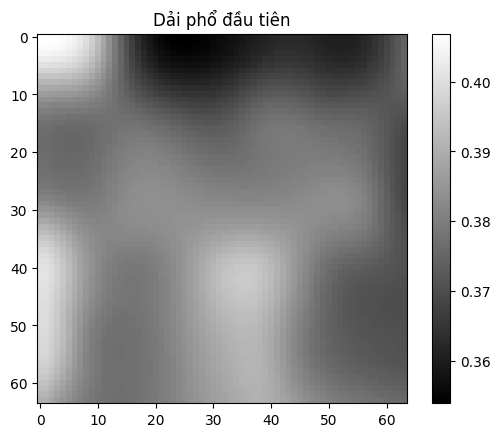

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị ảnh với các dải phổ khác nhau
plt.imshow(img_normalized[:, :, 0], cmap='gray')  # Hiển thị dải phổ đầu tiên (hoặc bạn có thể chọn dải phổ khác)
plt.title("Dải phổ đầu tiên")
plt.colorbar()
plt.show()


In [ ]:
import os

root_dir = "/content/eurosat_data/EuroSATallBands"

for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:  # chỉ in 5 file đầu mỗi thư mục cho ngắn gọn
        print(f"{subindent}{f}")

EuroSATallBands/
  label_map.json
  validation.csv
  train.csv
  test.csv
  Highway/
    Highway_653.tif
    Highway_683.tif
    Highway_412.tif
    Highway_1466.tif
    Highway_2240.tif
  Forest/
    Forest_1130.tif
    Forest_2638.tif
    Forest_1724.tif
    Forest_2213.tif
    Forest_2170.tif
  AnnualCrop/
    AnnualCrop_1702.tif
    AnnualCrop_2061.tif
    AnnualCrop_1703.tif
    AnnualCrop_2397.tif
    AnnualCrop_399.tif
  Residential/
    Residential_1325.tif
    Residential_2774.tif
    Residential_1323.tif
    Residential_2728.tif
    Residential_1249.tif
  River/
    River_973.tif
    River_124.tif
    River_2123.tif
    River_1240.tif
    River_1142.tif
  PermanentCrop/
    PermanentCrop_1666.tif
    PermanentCrop_1850.tif
    PermanentCrop_1809.tif
    PermanentCrop_1504.tif
    PermanentCrop_697.tif
  Industrial/
    Industrial_2067.tif
    Industrial_2184.tif
    Industrial_2073.tif
    Industrial_1333.tif
    Industrial_1494.tif
  Pasture/
    Pasture_875.tif
    Pasture_

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 101.2 MB/s eta 0:00:00


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Tạo transform
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:111: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
import pandas as pd
import os
import torch
from torch.utils.data import Dataset
import rasterio
import numpy as np
from torchvision import transforms

class EuroSATCSV(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.root_dir, row['Filename'])
        label = int(row['Label'])

        with rasterio.open(img_path) as src:
            img = src.read().astype(np.float32)  # (13, 64, 64)
            img = img / 10000.0
            img = np.transpose(img, (1, 2, 0))  # (H, W, C) cho albumentations

        if self.transform:
            img = self.transform(image=img)["image"]  # có thể là Tensor

        if isinstance(img, np.ndarray):
            # Nếu là ndarray thì chuyển về (C, H, W)
            img = img.transpose((2, 0, 1))
            img = torch.tensor(img, dtype=torch.float32)
        elif isinstance(img, torch.Tensor):
            if img.ndim == 3 and img.shape[0] != 13:
                img = img.permute(2, 0, 1).float()

        # print(f"DEBUG - Image shape: {img.shape}")
        return img, label

In [ ]:
base_path = "/content/eurosat_data/EuroSATallBands"

train_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "train.csv"),
    root_dir=base_path,
    transform=train_transform
)

val_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "validation.csv"),
    root_dir=base_path,
)

test_dataset = EuroSATCSV(
    csv_file=os.path.join(base_path, "test.csv"),
    root_dir=base_path,
)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


BASE VIT

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=13, patch_size=4, emb_size=128, img_size=64):
        super().__init__()
        self.patch_size = patch_size
        self.emb_size = emb_size
        self.n_patches = (img_size // patch_size) ** 2

        self.proj = nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, emb_size))
        self.pos_embed = nn.Parameter(torch.randn(1, self.n_patches + 1, emb_size))

    def forward(self, x):
        B = x.size(0)
        x = self.proj(x)  # (B, emb_size, H', W')
        x = x.flatten(2).transpose(1, 2)  # (B, N, emb_size)

        cls_tokens = self.cls_token.expand(B, -1, -1)  # (B, 1, emb_size)
        x = torch.cat([cls_tokens, x], dim=1)  # (B, N+1, emb_size)
        x = x + self.pos_embed
        return x

In [ ]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self, emb_size, heads, dropout=0.1, expansion=4):
        super().__init__()
        self.norm1 = nn.LayerNorm(emb_size)
        self.attn = nn.MultiheadAttention(embed_dim=emb_size, num_heads=heads, batch_first=True)
        self.dropout1 = nn.Dropout(dropout)

        self.norm2 = nn.LayerNorm(emb_size)
        self.mlp = nn.Sequential(
            nn.Linear(emb_size, emb_size * expansion),
            nn.GELU(),
            nn.Linear(emb_size * expansion, emb_size),
        )
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        x_attn, _ = self.attn(self.norm1(x), self.norm1(x), self.norm1(x))
        x = x + self.dropout1(x_attn)
        x_mlp = self.mlp(self.norm2(x))
        x = x + self.dropout2(x_mlp)
        return x

In [ ]:
class VisionTransformer(nn.Module):
    def __init__(self, in_channels=13, img_size=64, patch_size=4, emb_size=128, depth=6, heads=8, num_classes=10):
        super().__init__()
        self.patch_embed = PatchEmbedding(in_channels, patch_size, emb_size, img_size)
        self.transformer = nn.Sequential(
            *[TransformerEncoderBlock(emb_size, heads) for _ in range(depth)]
        )
        self.norm = nn.LayerNorm(emb_size)
        self.head = nn.Linear(emb_size, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.transformer(x)
        cls_token_final = x[:, 0]  # lấy token đầu tiên (CLS token)
        x = self.norm(cls_token_final)
        x = self.head(x)
        return x

In [ ]:
def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    return correct / total

In [ ]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    total_acc = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * labels.size(0)
        total_acc += calculate_accuracy(outputs, labels) * labels.size(0)

    avg_loss = total_loss / len(loader.dataset)
    avg_acc = total_acc / len(loader.dataset)
    return avg_loss, avg_acc


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    total_acc = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * labels.size(0)
            total_acc += calculate_accuracy(outputs, labels) * labels.size(0)

    avg_loss = total_loss / len(loader.dataset)
    avg_acc = total_acc / len(loader.dataset)
    return avg_loss, avg_acc

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VisionTransformer(
    in_channels=13,
    img_size=64,
    patch_size=4,
    emb_size=256,
    depth=12,
    heads=16,
    num_classes=10
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

num_epochs = 50

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    print(f"Epoch {epoch}/{num_epochs}")
    print(f"  Train     Loss: {train_loss:.4f} | Accuracy: {train_acc:.4f}")
    print(f"  Val       Loss: {val_loss:.4f}   | Accuracy: {val_acc:.4f}")

Epoch 1/50
  Train     Loss: 1.3897 | Accuracy: 0.4687
  Val       Loss: 1.0289   | Accuracy: 0.6286
Epoch 2/50
  Train     Loss: 0.8882 | Accuracy: 0.6708
  Val       Loss: 0.7543   | Accuracy: 0.7313
Epoch 3/50
  Train     Loss: 0.7438 | Accuracy: 0.7333
  Val       Loss: 0.7092   | Accuracy: 0.7423
Epoch 4/50
  Train     Loss: 0.6583 | Accuracy: 0.7688
  Val       Loss: 0.6096   | Accuracy: 0.7815
Epoch 5/50
  Train     Loss: 0.5933 | Accuracy: 0.7873
  Val       Loss: 0.6235   | Accuracy: 0.7770
Epoch 6/50
  Train     Loss: 0.5530 | Accuracy: 0.8029
  Val       Loss: 0.5359   | Accuracy: 0.8014
Epoch 7/50
  Train     Loss: 0.5123 | Accuracy: 0.8207
  Val       Loss: 0.5185   | Accuracy: 0.8179
Epoch 8/50
  Train     Loss: 0.4906 | Accuracy: 0.8247
  Val       Loss: 0.5012   | Accuracy: 0.8123
Epoch 9/50
  Train     Loss: 0.4647 | Accuracy: 0.8341
  Val       Loss: 0.4308   | Accuracy: 0.8516
Epoch 10/50
  Train     Loss: 0.4364 | Accuracy: 0.8454
  Val       Loss: 0.4451   | Accura

In [ ]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Test Loss: 0.1971 | Test Accuracy: 0.9326


In [ ]:
# save_path = "/content/drive/MyDrive/Document for Capstone/T_Capstone draft2 ViT ver2.pth"
# torch.save(model, save_path)